# Import Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [3]:
from IPython.core.display import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Read Data

In [4]:
house_data = pd.read_excel('Redfin_New_Cleaned.xlsx')
house_data

,address,locality,region,postal_code,price,beds,baths,per_sq_ft,area,on_redfin,...,lot_size,stories,county,walkable,walkable Score,transit,transit score,bikeable,bikeable score,schools
0,3715 Branding Iron Pl,Dublin,CA,94568,540000,2.0,1.50,531.0,1017.0,6,...,NaN,NaN,Alameda,Car-Dependent,3.0,NaN,NaN,Somewhat Bikeable,17.0,4
1,4453 Porter St,Fremont,CA,94538,799000,3.0,NaN,841.0,950.0,7,...,"5,362 square feet",NaN,Alameda,Somewhat Walkable,50.0,Minimal Transit,37.0,Bikeable,50.0,3
2,661 Lee Ave,San Leandro,CA,94577,799000,2.0,1.50,515.0,1550.0,12,...,"3,900 square feet",NaN,Alameda,Very Walkable,81.0,Good Transit,54.0,Very Bikeable,73.0,3
3,2070 Forino Dr,Dublin,CA,94568,1489000,5.0,3.50,420.0,3545.0,5,...,"5,140 square feet",2,Alameda,Car-Dependent,13.0,NaN,NaN,Somewhat Bikeable,11.0,5
4,5321 N Esprit Loop,Dublin,CA,94568,790000,3.0,2.50,494.0,1598.0,5,...,NaN,3+,Alameda,Somewhat Walkable,54.0,NaN,NaN,Very Bikeable,90.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3368,103 Treanor Ave,Glendora,CA,91741,788000,4.0,2.00,361.0,2182.0,1,...,"8,693 square feet",NaN,Los Angeles,Car-Dependent,37.0,Minimal Transit,33.0,Somewhat Bikeable,39.0,3
3369,264 W Grandview Dr,Azusa,CA,91702,524999,3.0,1.75,364.0,1441.0,1,...,"7,036 square feet",NaN,Los Angeles,Somewhat Walkable,62.0,Minimal Transit,34.0,Somewhat Bikeable,46.0,3
3370,1309 Via Gabriel,Palos Verdes Estates,CA,90274,2250000,5.0,4.00,692.0,3252.0,1,...,0.31 acres,NaN,Los Angeles,Car-Dependent,9.0,NaN,NaN,Somewhat Bikeable,6.0,4
3371,930 Golden Springs Dr Unit B,Diamond Bar,CA,91765,485000,3.0,2.25,342.0,1420.0,1,...,"3,402 square feet",NaN,Los Angeles,Car-Dependent,24.0,NaN,NaN,Somewhat Bikeable,19.0,3


In [71]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3373 entries, 0 to 3372
Data columns (total 27 columns):
address           3373 non-null object
locality          3373 non-null object
region            3373 non-null object
postal_code       3355 non-null object
price             3373 non-null float64
beds              3373 non-null float64
baths             2736 non-null float64
per_sq_ft         3373 non-null float64
area              3373 non-null float64
on_redfin         3373 non-null int64
status            3311 non-null object
built             3016 non-null float64
type              2751 non-null object
style             1152 non-null object
view              1080 non-null object
community         3361 non-null object
mls               3255 non-null object
lot_size          2989 non-null object
stories           524 non-null object
county            3373 non-null object
walkable          3362 non-null object
walkable Score    3362 non-null float64
transit           1401 non-nul

# Data Cleaning 

In [6]:
house_data["per_sq_ft"].isnull().sum()

972

In [7]:
house_data["per_sq_ft"] = house_data["per_sq_ft"].fillna(house_data["per_sq_ft"].mean())

In [8]:
house_data["area"].isnull().sum()

421

In [9]:
house_data["area"] = house_data["area"].fillna(house_data["area"].mean())

In [10]:
house_data["beds"].isnull().sum()

385

In [11]:
house_data["beds"] = house_data["beds"].fillna(house_data["beds"].mean())

In [12]:
house_data["baths"].isnull().sum()

637

In [13]:
house_data.price = house_data.price.astype(float)

# Data Distribution across various features

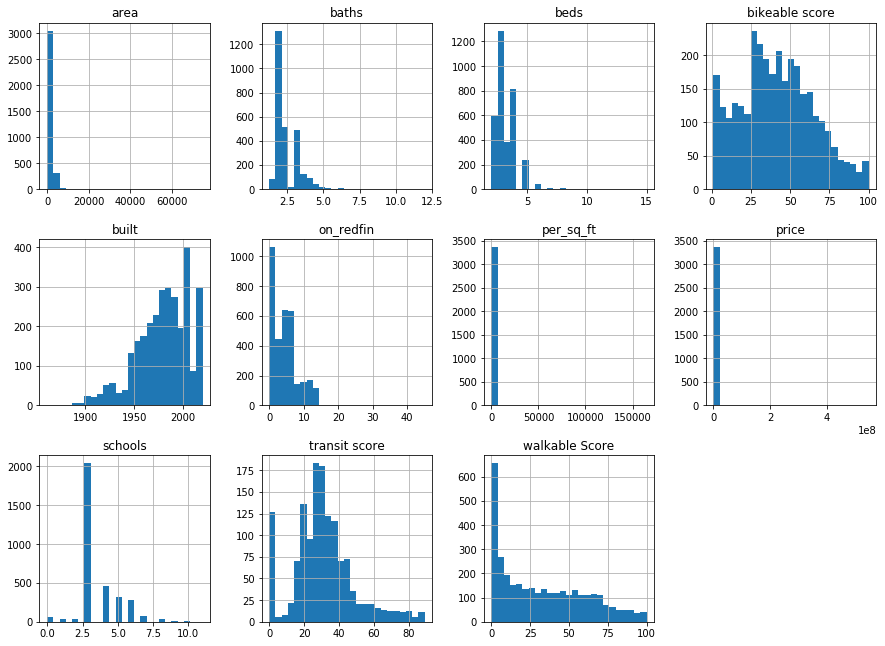

In [14]:
house_data.hist(bins=25, layout=(4,4), figsize=(15,15))
plt.show()

- From the above figure we see that features like area, per_sq_ft, price, beds are highly skewed.
- To remove the skewness we are using the iqr_filter method

In [34]:
def iqr_filter(df, column):
    med = df[column].median()
    p_25 = df[column].quantile(q=0.25)
    p_75 = df[column].quantile(q=0.75)
    
    # find valid range
    iqr_range = [med-(2*p_25), med+(2*p_75)]
    print("Column: {}, Median:{}, 25%:{}, 75%:{}, IQR:{}:{}".format(column,med,
                                                                    p_25,p_75,
                                                                    iqr_range[0].round(2),
                                                                    iqr_range[1].round(2)))
    
    # filter
    df_to_keep = df[(df[column] > iqr_range[0]) & (df[column] < iqr_range[1])]
    
    #prints
    num_rows_dropped = house_data.shape[0] - df_to_keep.shape[0]
    print("Number of rows dropped: " + str(num_rows_dropped))
    
    return df_to_keep

In [38]:
house_df = iqr_filter(house_data,'price')
house_df_b = iqr_filter(house_df,'beds')
house_df_baths = iqr_filter(house_df_b,'baths')
house_df1 = iqr_filter(house_df_baths,'per_sq_ft')
house_df2 = iqr_filter(house_df1,'area')

Column: price, Median:529900.0, 25%:345000.0, 75%:879000.0, IQR:-160100.0:2287900.0
Number of rows dropped: 144
Column: beds, Median:3.0, 25%:3.0, 75%:4.0, IQR:-3.0:11.0
Number of rows dropped: 147
Column: baths, Median:2.0, 25%:2.0, 75%:3.0, IQR:-2.0:8.0
Number of rows dropped: 760
Column: per_sq_ft, Median:429.0, 25%:260.0, 75%:526.1424406497292, IQR:-91.0:1481.28
Number of rows dropped: 762
Column: area, Median:1816.0, 25%:1406.0, 75%:2295.5, IQR:-996.0:6407.0
Number of rows dropped: 763


- Checking the data distribution after after removing the skewness

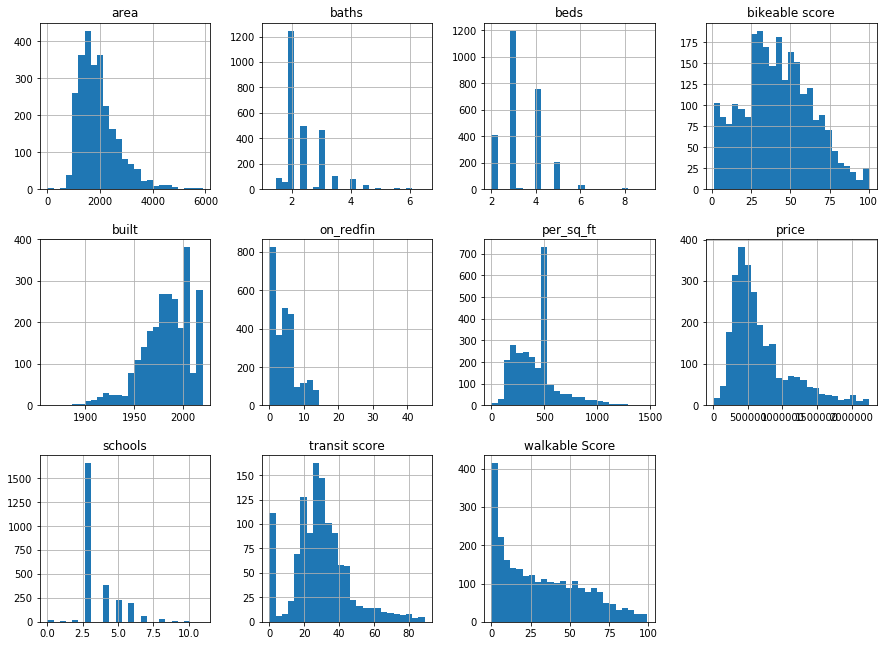

In [40]:
house_df2.hist(bins=25, layout=(4,4), figsize=(15,15))
plt.show()

# Correlation Heatmap

What is a heatmap?
- A heatmap is a graphical representation of data in which data values are represented as colors. 
- That is, it uses color in order to communicate a value to the reader. 
- This is a great tool to assist the audience towards the areas that matter the most when you have a large volume of data.

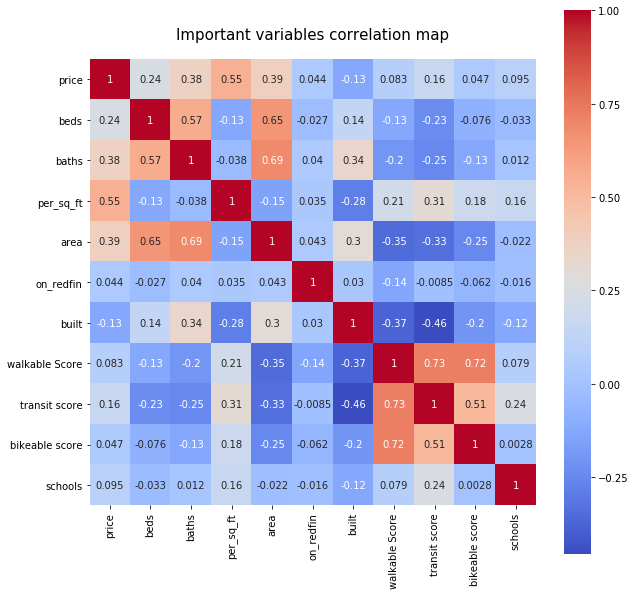

In [22]:
fig, ax = plt.subplots(figsize=(10,10))  
corrmat = house_df2.corr(method='spearman')
sns.heatmap(corrmat, vmax=1., cmap='coolwarm',annot=True,ax=ax,square=True)
plt.title("Important variables correlation map", fontsize=15,pad=20)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

- From the above figure, we can understand the relationship between various features.
- positive values state the features are postively correlated,
i.e the value of one feature increases with the increase in other feature
- similar negative values represent negative correlation
- value 1 stands for a good relation between the features

# Interactive Box-Plot 

- This is an overall analysis for all 36 counties in california
- Box-Plot helps to undertsand the max,min,median,q1,q3 price value of houses across county

Steps to Read the below chart:
1. Over on any county box-plot. On hover it show max,min,median,q1,q3 price values acrros respective county.
2. Right panel shows all 36 counties from california. By selecting any particular county,that county gets hidden.

In [49]:
med_house_price = house_data.groupby('county', as_index=True)['price'].median().sort_values(ascending = False).tail(10)
med_house_price = pd.DataFrame(med_house_price)
med_house_price


,price
county,
Stanislaus,350000.0
Calaveras,349900.0
Amador,335000.0
Glenn,332000.0
Merced,322500.0
Fresno,316200.0
Madera,310000.0
Butte,285000.0
Kern,229950.0


In [45]:
house_df2[['price', 'county']].pivot(columns='county', values='price').iplot(kind='box',
                                                                             title= "Box-Plot Price Vs County ",
                                                                             xTitle = 'County', yTitle = 'Price')

# Insights:

- From the Analysis, "San Francisco" has highest house price value of 2.19M 
- As the city consist of large numbers of work place, prices of housing is expensive compared to other cities.

# Question 1: Does the "number of schools" affect the "price of house"?

- There is no deny to the fact that number of schools affect the price of houses.
- To understand this, we looked into correlation coefficient between the number of schools and price of house.
- To visualize it better, we plotted a regplot using seaborn library.

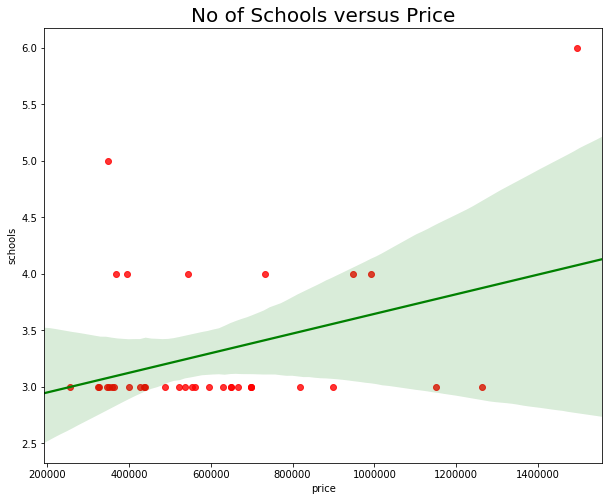

In [50]:
med_house = house_df2.groupby('county', as_index=True)['price'].median().sort_values(ascending = False)
med_house_df = pd.DataFrame(med_house)

med_schools = house_df2.groupby('county', as_index=True)['schools'].median().sort_values(ascending = False)
med_schools_df = pd.DataFrame(med_schools)

school_price_df = pd.merge(left=med_house_df, right=med_schools_df, how='left', on='county')

plt.figure(figsize = (10,8))
sns.regplot('price','schools',data=school_price_df, ci = 95, scatter_kws = {'color': 'r'}, line_kws = {'color':'g'})

plt.title('No of Schools versus Price', fontsize = 20)
plt.show()


# Insights:

- The above chart represents relation between the number of schools and price of house. 
- From the above chart, we observe that as the number of schools increase, the price of houses increase
- Therefore we can say that price of houses are affected by the number of schools in that county.
- To investigate by how much the price of the houses is hiked with respect to number of schools we will build regression model.

# Question 2: Which counties among 36 counties have Excellent, Good, Minimal transit feature?

- If a person is heavily dependent on public transport for daily workmight be interested in transit feature of county while buying house
- To understand this better we plotted a interactive scatter plot using plotly and cufflinks.

In [29]:
house_df2.iplot(kind="scatter", theme="white",x="county",y="price", xTitle = 'County', yTitle = 'Price',
                title= "Transit Chart", 
                categories="transit" , showticklabels=True,)

- The above chart represents transit feature county wise with price 
- The transit is divided into three categories (Excellent Transit, Minimal Transit, Good Transit)

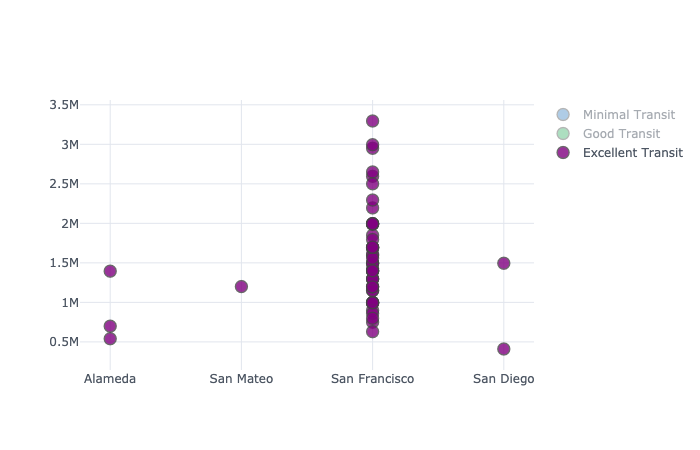

In [43]:
Image(filename="newplot.png",width=700, height=50)

- When we select Excellent Transit paramter to sort, we observe Counties like 
'Alameda', 'San Mateo','San Francisco','San Diego' have Excellent Transit

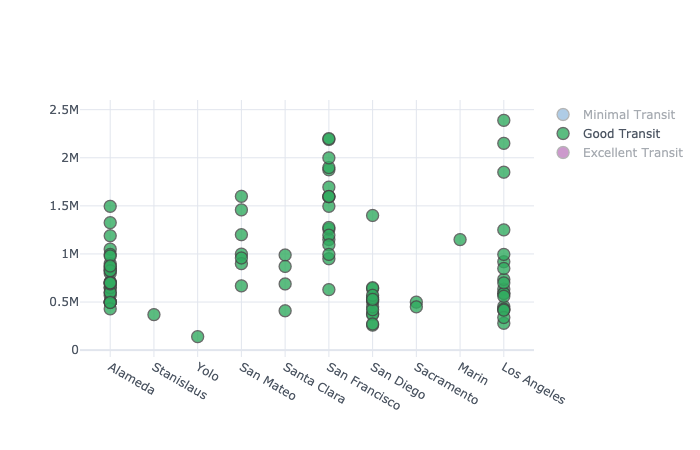

In [52]:
Image(filename="newplot1.png",width=700, height=50)

- When we select Excellent Transit paramter to sort, we observe some new counties with Excellent Counties like 
 have Good Transit

# Linear Regression

- Build a Regression Model to check by how much the price of house is increased in respect to number of schools. 

In [54]:
y = house_df2['price']
X = house_df2[['beds', 'baths','per_sq_ft', 'area','schools']]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [56]:
lm = LinearRegression()

In [57]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-4815.61591972 97296.87230548  1402.17085026   233.42216755
  4153.29532755]


In [59]:
predictions = lm.predict( X_test)

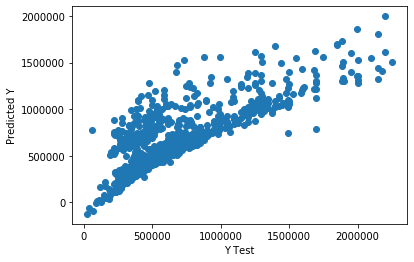

In [60]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [61]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 189187.15582121984
MSE: 65064798583.049805
RMSE: 255078.02450044538


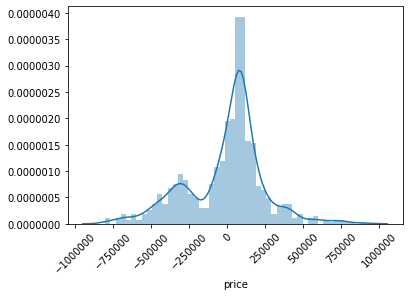

In [74]:
sns.distplot((y_test-predictions),bins=50);
plt.xticks(rotation=45)
plt.show()

In [63]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
beds,-4815.615920
baths,97296.872305
per_sq_ft,1402.170850
area,233.422168
schools,4153.295328


- From this model, we observe that price of house increase by ~$4153 with respect to number of schools